# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                                       url_inmueble  \
0           912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
1           916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
2           916350408.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3           916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
4           912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
...                 ...                                                ...   
15330       911360461.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
15331       912788039.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
15332       912780348.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
15333       912788039.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
15334       911360461.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

       rooms  bathrooms  surface   price  ... level4Id level5Id level6Id  \
0        3.0        2.0    103.0  195000  ...        0        0        0   
1        3.0        1.0      NaN   89000  ...        0        0        0   
2        2.0        2.0     99.0  390000  ...        0        0        0   
3        3.0        1.0     86.0   89000  ...        0        0        0   
4        2.0        2.0    106.0  172000  ...        0        0        0   
...      ...        ...      ...     ...  ...      ...      ...      ...   
15330    2.0        1.0     96.0  259470  ...        0        0        0   
15331    3.0        1.0    150.0  165000  ...        0        0        0   
15332    4.0        2.0    175.0  495000  ...        0        0        0   
15333    3.0        2.0    101.0  195000  ...        0        0        0   
15334    3.0        2.0    152.0  765000  ...        0        0        0   

      level7Id level8Id accuracy          latitude          longitude zipCode  \
0            0        0        0  40,2948276786438  -3,44402412135624     NaN   
1            0        0        1          40,28674           -3,79351     NaN   
2            0        0        0  40,4115646786438  -3,90662252135624     NaN   
3            0        0        0  40,2853785786438  -3,79508142135624     NaN   
4            0        0        0  40,2998774864376  -3,45226301356237     NaN   
...        ...      ...      ...               ...                ...     ...   
15330        0        0        0          40,45416           -3,70286     NaN   
15331        0        0        0          40,36652           -3,48951     NaN   
15332        0        0        0          40,57444           -3,92124     NaN   
15333        0        0        0          40,36967           -3,48105     NaN   
15334        0        0        0          40,45773           -3,69068     NaN   

      customZone  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
15330        NaN  
15331        NaN  
15332        NaN  
15333        NaN  
15334        NaN  

[15335

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Convertir la columna de precio a número (si tiene símbolos o espacios)
ds['price'] = ds['price'].replace('[\€,]', '', regex=True).astype(float)

# Encontrar la casa más cara
casa_mas_cara = ds.loc[ds['price'].idxmax()]

# Extraer dirección y precio
direccion = casa_mas_cara['address']
precio = casa_mas_cara['price']

# Imprimir resultado
print(f"La casa con dirección en {direccion} es la más cara y su precio es de {precio} USD")


La casa con dirección en El Escorial es la más cara y su precio es de 8500000.0 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
import pandas as pd


ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar precios válidos (mayores a 0)
ds_valid = ds[ds['price'] > 0]


if not ds_valid.empty:
    # Encontrar la casa más barata
    cheapest_house = ds_valid.loc[ds_valid['price'].idxmin()]
    print(f"La casa con dirección en {cheapest_house['address']} es la más barata y su precio es de {cheapest_house['price']} USD")
else:
    print("No hay casas con un precio mayor a 0 en el dataset.")




La casa con dirección en Berlin, Coslada es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
# import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Convertir la columna de superficie a número (si tiene símbolos o espacios)
ds['surface'] = ds['surface'].replace('[\ m²,]', '', regex=True).astype(float)

# Encontrar la casa más grande y la más pequeña
casa_mas_grande = ds.loc[ds['surface'].idxmax()]
casa_mas_pequena = ds.loc[ds['surface'].idxmin()]

# Extraer direcciones y superficies
direccion_grande = casa_mas_grande['address']
superficie_grande = casa_mas_grande['surface']

direccion_pequena = casa_mas_pequena['address']
superficie_pequena = casa_mas_pequena['surface']

# Imprimir resultados
print(f"La casa más grande está ubicada en {direccion_grande} y su superficie es de {superficie_grande} metros cuadrados.")
print(f"La casa más pequeña está ubicada en {direccion_pequena} y su superficie es de {superficie_pequena} metros cuadrados.")


La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros cuadrados.
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros cuadrados.


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
# import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Obtener las poblaciones únicas
poblaciones_unicas = ds['level5'].dropna().unique()

# Convertir la lista en una cadena separada por comas
poblaciones = ", ".join(poblaciones_unicas)

# Imprimir el resultado
print(poblaciones)


Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Verificar si hay valores NaN en el dataset
tiene_nas = ds.isna().any().any()

# Mostrar el resultado
print(tiene_nas)

# Si hay NAs, mostrar las columnas y filas donde aparecen
if tiene_nas:
    print("\nColumnas con NAs:")
    print(ds.isna().sum()[ds.isna().sum() > 0])  # Muestra cuántos NAs hay por columna

    print("\nFilas con NAs:")
    print(ds[ds.isna().any(axis=1)])  # Muestra las filas con al menos un NA


True

Columnas con NAs:
realEstate_name        10
phone_realEstate      794
rooms                 353
bathrooms             345
surface              1250
description           142
level4               6643
level6              14627
level7               2277
level8               8579
zipCode             15335
customZone          15335
dtype: int64

Filas con NAs:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
153

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Obtener dimensiones antes de eliminar NAs
dim_antes = ds.shape  

# Eliminar filas con valores NaN
ds_limpio = ds.dropna()

# Obtener dimensiones después de eliminar NAs
dim_despues = ds_limpio.shape  

# Imprimir comparación
print(f"Dimensiones antes de eliminar NAs: {dim_antes}")
print(f"Dimensiones después de eliminar NAs: {dim_despues}")


Dimensiones antes de eliminar NAs: (15335, 37)
Dimensiones después de eliminar NAs: (0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar por la población "Arroyomolinos (Madrid)"
ds_arroyomolinos = ds[ds['level5'] == "Arroyomolinos (Madrid)"]

# Calcular la media de precios
media_precio = ds_arroyomolinos['price'].mean()

# Imprimir el resultado
print(f"La media de precios en Arroyomolinos (Madrid) es: {media_precio:.2f} USD")


La media de precios en Arroyomolinos (Madrid) es: 294541.60 USD


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


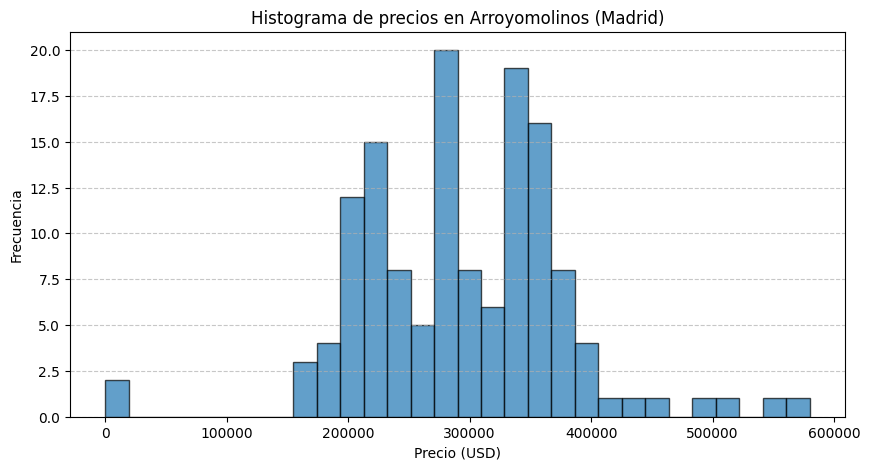

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar por la población "Arroyomolinos (Madrid)"
ds_arroyomolinos = ds[ds['level5'] == "Arroyomolinos (Madrid)"]

# Graficar el histograma de precios
plt.figure(figsize=(10, 5))
plt.hist(ds_arroyomolinos['price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios en Arroyomolinos (Madrid)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**TODO: Markdown**. Si el histograma está sesgado a la derecha, significa que hay muchas casas con precios bajos y unas pocas muy caras.
Si el histograma es simétrico, significa que los precios están distribuidos de manera uniforme.
Puede haber picos en ciertos rangos de precio, indicando que la mayoría de las casas están en ese valor.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar por las poblaciones "Valdemorillo" y "Galapagar"
precio_valdemorillo = ds[ds['level5'] == "Valdemorillo"]['price'].mean()
precio_galapagar = ds[ds['level5'] == "Galapagar"]['price'].mean()

# Imprimir los resultados
print(f"El precio promedio en Valdemorillo es: {precio_valdemorillo:.2f} USD")
print(f"El precio promedio en Galapagar es: {precio_galapagar:.2f} USD")

# Comparación
if abs(precio_valdemorillo - precio_galapagar) < 1e-6:
    print("Los precios promedios son prácticamente iguales.")
else:
    print("Los precios promedios son diferentes.")


El precio promedio en Valdemorillo es: 363860.29 USD
El precio promedio en Galapagar es: 360063.20 USD
Los precios promedios son diferentes.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Crear una nueva columna 'pps' (price per square meter)
ds['pps'] = ds['price'] / ds['surface']

# Filtrar por las poblaciones "Valdemorillo" y "Galapagar"
pps_valdemorillo = ds[ds['level5'] == "Valdemorillo"]['pps'].mean()
pps_galapagar = ds[ds['level5'] == "Galapagar"]['pps'].mean()

# Imprimir los resultados
print(f"El precio promedio por metro cuadrado en Valdemorillo es: {pps_valdemorillo:.2f} USD/m²")
print(f"El precio promedio por metro cuadrado en Galapagar es: {pps_galapagar:.2f} USD/m²")

# Comparación
if abs(pps_valdemorillo - pps_galapagar) < 1e-6:
    print("Los precios promedio por metro cuadrado son prácticamente iguales.")
else:
    print("Los precios promedio por metro cuadrado son diferentes.")


El precio promedio por metro cuadrado en Valdemorillo es: 1317.95 USD/m²
El precio promedio por metro cuadrado en Galapagar es: 1606.32 USD/m²
Los precios promedio por metro cuadrado son diferentes.


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

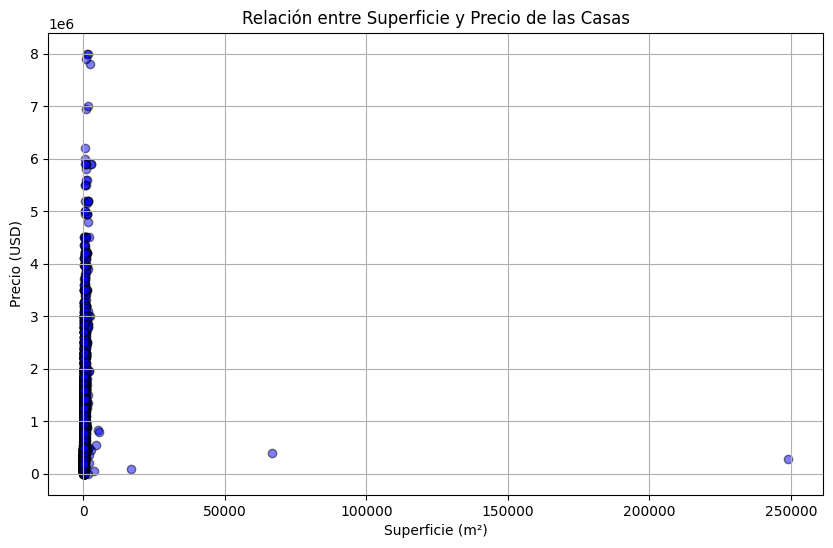

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Graficar la relación entre superficie y precio
plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Relación entre Superficie y Precio de las Casas')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()


**TODO: Markdown**. Si hay una correlación positiva (los puntos suben hacia la derecha), significa que a mayor superficie, mayor es el precio de las casas.

Si los puntos están dispersos sin un patrón claro, podría indicar que la superficie no tiene una relación directa con el precio de las casas en este dataset.

Si hay una gran concentración de puntos en áreas específicas, podrías tener casas con una superficie pequeña pero con precios altos, o viceversa, dependiendo de la ubicación y otros factores.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Contar cuántas agencias únicas hay en el dataset
agencias_unicas = ds['realEstate_name'].nunique()

# Imprimir el resultado
print(f"El dataset contiene {agencias_unicas} agencias de bienes raíces.")



El dataset contiene 1821 agencias de bienes raíces.


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Contar el número de casas por población
casas_por_poblacion = ds['level5'].value_counts()

# Obtener la población con la mayor cantidad de casas
poblacion_mayor_cantidad = casas_por_poblacion.idxmax()
numero_casas = casas_por_poblacion.max()

# Imprimir el resultado
print(f"La población con la mayor cantidad de casas es {poblacion_mayor_cantidad} con {numero_casas} casas.")


La población con la mayor cantidad de casas es  Madrid Capital con 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar el DataFrame para las poblaciones del cinturón sur de Madrid
cinturon_sur = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]

# Mostrar el subconjunto resultante
print(cinturon_sur)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

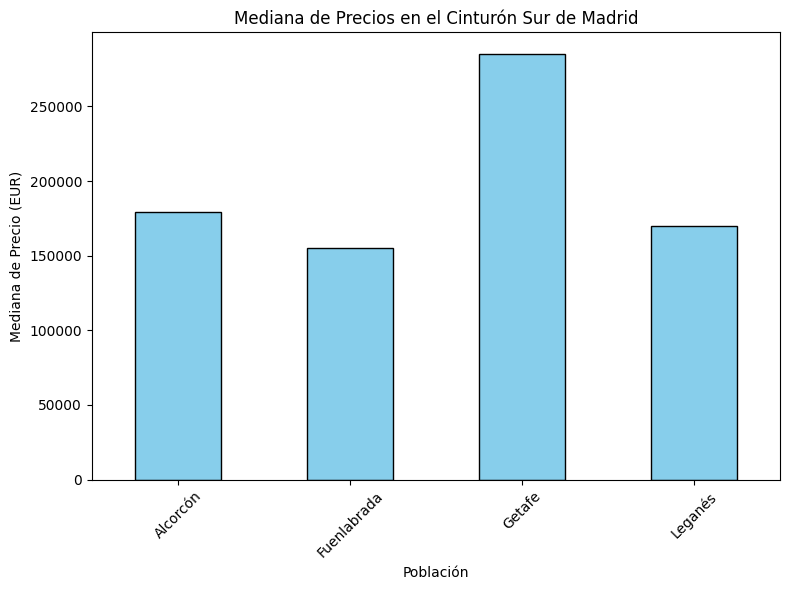

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar el DataFrame para las poblaciones del cinturón sur de Madrid
cinturon_sur = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]

# Calcular la mediana de los precios por población
mediana_precios = cinturon_sur.groupby('level5')['price'].median()

# Trazar el gráfico de barras
plt.figure(figsize=(8, 6))
mediana_precios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mediana de Precios en el Cinturón Sur de Madrid')
plt.xlabel('Población')
plt.ylabel('Mediana de Precio (EUR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**TODO: Markdown**. En el gráfico, podrás ver la mediana de los precios de las casas en las poblaciones de Fuenlabrada, Leganés, Getafe y Alcorcón.

Observa si hay alguna población con precios notablemente más altos o más bajos, lo que podría indicar una diferencia en la demanda o el tipo de viviendas disponibles en cada área.

El gráfico te permitirá comparar visualmente las diferencias en los precios medianos de las casas entre estas poblaciones.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
import pandas as pd

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar el DataFrame para las poblaciones del cinturón sur de Madrid
cinturon_sur = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]

# Calcular la media y varianza de muestra para las variables solicitadas
media = cinturon_sur[['price', 'rooms', 'surface', 'bathrooms']].mean()
varianza = cinturon_sur[['price', 'rooms', 'surface', 'bathrooms']].var()

# Imprimir los resultados
print("Media de las variables:")
print(media)

print("\nVarianza de muestra de las variables:")
print(varianza)


Media de las variables:
price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
dtype: float64

Varianza de muestra de las variables:
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
# Agrupar el DataFrame por la columna 'level5' (población)
# Y obtener el índice de la casa con el precio máximo en cada grupo
max_price_idx = cinturon_sur.groupby('level5')['price'].idxmax()

# Seleccionar las filas correspondientes a la casa más cara de cada población
most_expensive_houses = cinturon_sur.loc[max_price_idx, ['level5', 'address', 'price']]

# Imprimir los resultados
print(most_expensive_houses)


            level5                                address    price
5585      Alcorcón                               Alcorcón   950000
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881        Getafe                                 Getafe  1050000
10412      Leganés           Avenida Reina Sofía, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_4979/1245858579.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinturon_sur['price_normalized'] = cinturon_sur.groupby('level5')['price'].transform(


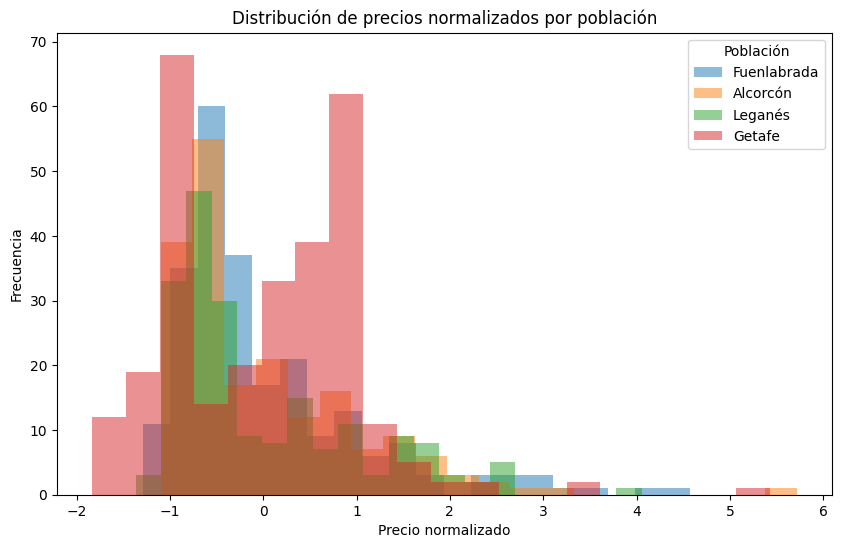

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filtrar el DataFrame para las poblaciones del cinturón sur de Madrid
cinturon_sur = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]

# Inicializar el escalador
scaler = StandardScaler()

# Normalizar la variable 'price' por cada población
cinturon_sur['price_normalized'] = cinturon_sur.groupby('level5')['price'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()  # Usamos flatten para hacer el array 1D
)

# Graficar los histogramas
plt.figure(figsize=(10,6))

# Traza un histograma para cada población en el cinturón sur
for population in cinturon_sur['level5'].unique():
    subset = cinturon_sur[cinturon_sur['level5'] == population]
    plt.hist(subset['price_normalized'], bins=20, alpha=0.5, label=population)

# Etiquetas y título
plt.title('Distribución de precios normalizados por población')
plt.xlabel('Precio normalizado')
plt.ylabel('Frecuencia')
plt.legend(title='Población')

# Mostrar el gráfico
plt.show()



**TODO: Markdown**. Si observamos que los histogramas de algunas poblaciones tienen más concentración de datos hacia la izquierda o derecha, esto indica que el precio de las casas en esas áreas es más bajo o más alto en comparación con otras poblaciones.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
# Crear la columna de precio por metro cuadrado (pps)
cinturon_sur['pps'] = cinturon_sur['price'] / cinturon_sur['surface']

# Filtrar el subconjunto para obtener solo los datos de 'Getafe' y 'Alcorcón'
getafe_alcorcon = cinturon_sur[cinturon_sur['level5'].isin(['Getafe', 'Alcorcón'])]

# Calcular la media de los precios por metro cuadrado (pps) para cada municipio
average_pps = getafe_alcorcon.groupby('level5')['pps'].mean()

# Imprimir el resultado para comparar los precios por metro cuadrado entre ambos municipios
print(average_pps)


level5
Alcorcón    2239.302480
Getafe      2066.314949
Name: pps, dtype: float64


/tmp/ipykernel_4979/2724480121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinturon_sur['pps'] = cinturon_sur['price'] / cinturon_sur['surface']


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [21]:
# Crear la columna de precio por metro cuadrado (pps)
cinturon_sur['pps'] = cinturon_sur['price'] / cinturon_sur['surface']

# Filtrar el subconjunto para obtener solo los datos de 'Getafe' y 'Alcorcón'
getafe_alcorcon = cinturon_sur[cinturon_sur['level5'].isin(['Getafe', 'Alcorcón'])]

# Calcular la media de los precios por metro cuadrado (pps) para cada municipio
average_pps = getafe_alcorcon.groupby('level5')['pps'].mean()

# Imprimir el resultado para comparar los precios por metro cuadrado entre ambos municipios
print(average_pps)


level5
Alcorcón    2239.302480
Getafe      2066.314949
Name: pps, dtype: float64


/tmp/ipykernel_4979/2724480121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinturon_sur['pps'] = cinturon_sur['price'] / cinturon_sur['surface']


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
import pandas as pd
from ipyleaflet import Map, CircleMarker, Popup
from ipywidgets import HTML

# Cargar los datos del cinturón sur de Madrid
cinturon_sur = pd.read_csv("ruta_del_archivo.csv")

# Filtrar las poblaciones que nos interesan, asegúrate de que las columnas existan en tu DataFrame
poblaciones_seleccionadas = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
cinturon_sur_seleccionado = cinturon_sur[cinturon_sur['level5'].isin(poblaciones_seleccionadas)]

# Crear un mapa centrado en Madrid
mapa = Map(center=(40.4168, -3.7038), zoom=10, basemap='OpenStreetMap')

# Crear un diccionario para las coordenadas por población
coordenadas_dict = {}

for poblacion in poblaciones_seleccionadas:
    poblacion_data = cinturon_sur_seleccionado[cinturon_sur_seleccionado['level5'] == poblacion]
    coordenadas_dict[poblacion] = poblacion_data[['lat', 'lon']].values

# Colores para cada población
colores = {
    'Fuenlabrada': 'blue',
    'Leganés': 'green',
    'Getafe': 'red',
    'Alcorcón': 'purple'
}

# Añadir los puntos al mapa con el color correspondiente
for poblacion, coordenadas in coordenadas_dict.items():
    for coord in coordenadas:
        lat, lon = coord
        marker = CircleMarker(location=(lat, lon), radius=8, color=colores[poblacion],
                              fill_opacity=0.6, fill_color=colores[poblacion])
        
        # Crear un popup con el nombre de la población
        popup = Popup(child=HTML(value=f'<b>Población: {poblacion}</b>'))
        marker.popup = popup
        
        # Añadir el marcador al mapa
        mapa.add_layer(marker)

# Mostrar el mapa interactivo
mapa




FileNotFoundError: [Errno 2] No such file or directory: 'ruta_del_archivo.csv'